<a href="https://colab.research.google.com/github/AbrahamLugoRamirez/Puzzle-slide-IA/blob/master/PuzzleSlide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Picture charged and cut with exit!


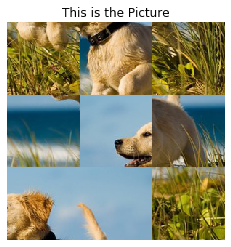

In [1]:
##Abraham Lugo Ramirez
## Cristian Zapata Lazaro
##Elkin Rodriguez

#Library
from PIL import Image
from itertools import groupby
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.crop
#Cara la imagen
imagen1 = Image.open('/content/foto.bmp')
datos_imagen = imagen1.getdata() #Se obtienen los datos
plt.imshow(imagen1)  ##
plt.axis('off')      ##  Con estas tres funciones se imprime la imagen
plt.title('This is the Picture')   ##
#Se corta la imagen en 9 pedasos
crop1 = datos_imagen.crop((0,0,100,100)) #arriba, derecha, abajo, izquierda
crop2 = datos_imagen.crop((100,0,200,100))
crop3 = datos_imagen.crop((200,0,300,100))
crop4 = datos_imagen.crop((0,100,100,200))
crop5 = datos_imagen.crop((100,100,200,200))
crop6 = datos_imagen.crop((200,100,300,200))
crop7 = datos_imagen.crop((0,200,100,300))
crop8 = datos_imagen.crop((100,200,200,300))
crop9 = datos_imagen.crop((200,200,300,300))
# se crean 9 imagenes nuevas de tamaño del cuadro. Tipo RGB
imagen1 = Image.new('RGB', (100,100))
imagen2 = Image.new('RGB', (100,100))
imagen3 = Image.new('RGB', (100,100))
imagen4 = Image.new('RGB', (100,100))
imagen5 = Image.new('RGB', (100,100))
imagen6 = Image.new('RGB', (100,100))
imagen7 = Image.new('RGB', (100,100))
imagen8 = Image.new('RGB', (100,100))
imagen9 = Image.new('RGB', (100,100)) 
#A cada imagen creada se le da como datos los cortados anteriormente
imagen1.putdata(crop1)
imagen2.putdata(crop2) 
imagen3.putdata(crop3) 
imagen4.putdata(crop4) 
imagen5.putdata(crop5) 
imagen6.putdata(crop6) 
imagen7.putdata(crop7) 
imagen8.putdata(crop8) 
imagen9.putdata(crop9) 
print('Picture charged and cut with exit!')
#Se guardan las imagenes en la siguiente ruta
#imagen1.save('/content/cuadro1.bmp')
#imagen2.save('/content/cuadro2.bmp') 
#imagen3.save('/content/cuadro3.bmp') 
#imagen4.save('/content/cuadro4.bmp') 
#imagen5.save('/content/cuadro5.bmp') 
#imagen6.save('/content/cuadro6.bmp') 
#imagen7.save('/content/cuadro7.bmp') 
#imagen8.save('/content/cuadro8.bmp') 
#imagen9.save('/content/cuadro9.bmp') 
  

       


Imagen Creada


(-0.5, 299.5, 299.5, -0.5)

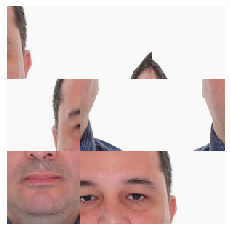

In [0]:
#Crear imagen desordenada a partir de los cuadros cortados
####
###
##
#
picture = Image.new('RGB', (300,300))
picture.paste(imagen2,(0,0))
picture.paste(imagen5,(100,0))
picture.paste(imagen3,(200,0))
picture.paste(imagen7,(0,100))
picture.paste(imagen6,(100,100))
picture.paste(imagen9,(200,100))
picture.paste(imagen8,(0,200))
picture.paste(imagen4,(100,200))
picture.paste(imagen2,(200,200))
picture.save('/content/picture.bmp')
print('Imagen Creada')
plt.imshow(picture)
plt.axis('off') 

#####
####
###
##
#

Posible imagen central:  2
Imagen  2 va en la posicion:  5
Imagen  6 va en la posicion:  6
Imagen  1 va en la posicion:  8
Imagen  4 va en la posicion:  4
Imagen  7 va en la posicion:  2
Imagen  3 va en la posicion:  9
Imagen  5 va en la posicion:  1
Imagen  8 va en la posicion:  3
Imagen  9 va en la posicion:  7
This is vector state:  [4, 6, 7, 3, 1, 5, 8, 0, 2]
Objetivo --> [4, 6, 7, 3, 1, 5, 8, 0, 2]
Objetivo finally:  ['8', '5', '0', '4', '1', '6', '2', '3', '7']


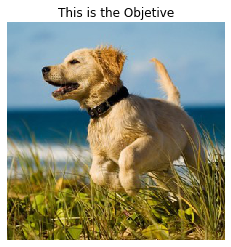

In [3]:
##Comparar pixeles
def comparar(imag1, imag2, opc):
  R = []
  G = []
  B = [] 
  RR = []
  GG = []
  BB = []
  for i in range(100): 
    #Tenemos 4 opciones para comparar dos imagenes pixel a pixel, teniendo en cuanta imag1 y imag2
    #Opc == 0, Comparamos toda la ultima columna de la image1 con la primera columna de la imag2
    #Opc == 1, Comparamos toda la ultima fila de la image1 con la primera fila de la imag2
    #Opc == 2, Comparamos toda la primera columna de la image1 con la ultima columna de la imag2
    #Opc == 3, Comparamos toda la primera fila de la image1 con la ultima fila de la imag2
    if(opc == 0): 
      pixel = imag1.getpixel((99,i))
      pixel2 = imag2.getpixel((0,i))
    else:
      if(opc == 1):
        pixel = imag1.getpixel((i,99))
        pixel2 = imag2.getpixel((i,0))
      else:
        if(opc==2):
          pixel = imag1.getpixel((0,i))
          pixel2 = imag2.getpixel((99,i))
        else:
          if(opc==3):
            pixel = imag1.getpixel((i,0))
            pixel2 = imag2.getpixel((i,99))

    #Sacamos la media entre cada par de pixel, Teniendo en cuenta
    #composicion de color RGB.
    #RGB
    MediaR = (pixel[0]+pixel2[0])/2
    MediaG = (pixel[1]+pixel2[1])/2
    MediaB = (pixel[2]+pixel2[2])/2
    #Agregamos en un vector en cuanto varia (distancia euclidiana) cada par de pixel
    RR.append(np.sqrt(((pixel[0]-pixel2[0])**2+(pixel[1]-pixel2[1])**2+(pixel[2]-pixel2[2])**2)))
    #varianza muestral, teniendo en cuenta la media obtenida anteriormente
    R.append(((pixel[0]-MediaR)**2+(pixel2[0]-MediaR)**2)) 
    G.append(((pixel[1]-MediaG)**2+(pixel2[1]-MediaG)**2)) 
    B.append(((pixel[2]-MediaB)**2+(pixel2[2]-MediaB)**2))     
  return R, G, B, RR

#Variables a usar
im=[imagen1,imagen2,imagen3,imagen4, imagen5, imagen6, imagen7, imagen8, imagen9]
cuadr=['','','','','','','','','']
euc= 40
variR = 200
variG = 200
variB = 200
tope = 0
VRGB = [0,0,0,0]
#Funcion para ver si puede ser una posible candidato
def encontre(R,G,B,RR, f, c):
  RV=0
  GV=0
  BV=0
  RRR=0
  for M in range(100):
    RV = RV+R[M]
    GV = GV+G[M]
    BV = BV+B[M]  
    RRR=RRR+RR[M]    
  if((RV/100)<=variR and (GV/100)<= variG and (BV/100)<=variB or ((RRR/100)<=euc)):        
    return 1
  else:
    return 0
sw = 1

while(True):
  VRGB = [0,0,0,0]
  for i in range(9):
    math=0
    V=[0,0,0,0]
    C=['','','','']
    eucli=0
    RM=0
    GM=0
    BM=0    
    for j in range(9):    
      for k in range(4):
        if(j!=i):
          R,G,B,RR = comparar(im[i], im[j],k)
          #print('RR: ',RR)
          RV=0
          GV=0
          BV=0
          RRR=0
          for M in range(100):
            RV  += R[M]
            GV  += G[M]
            BV  += B[M]  
            RRR += RR[M]
          VRGB[0] += (RV/100)
          VRGB[1] += (GV/100)
          VRGB[2] += (BV/100)
          VRGB[3] += (RRR/100) 
          if(((RV/100)<=variR and (GV/100)<= variG and (BV/100)<=variB) or ((RRR/100)<=euc)):         
            math += 1
            V[k] = 1
            C[k] = j
            eucli = eucli +  RRR/100
            RM += (RV/100)
            GM += (GV/100)
            BM += (BV/100)
            
    Veri=['','','','']
    if(math==4 and V[0]==1 and V[1]==1 and V[2]==1 and V[3]==1):
      print('Posible imagen central: ', i+1)      
      if(V[0]==1 and V[1]==1 and V[2]==1 and V[3]==1):
        cuadr[4]=i
        cuadr[5] = C[0]
        cuadr[7] = C[1]
        cuadr[3] = C[2]
        cuadr[1] = C[3]
        print('Imagen ', i+1, 'va en la posicion: ' , 5)
        print('Imagen ', C[0]+1, 'va en la posicion: ', 6)
        print('Imagen ', C[1]+1, 'va en la posicion: ', 8)
        print('Imagen ', C[2]+1, 'va en la posicion: ', 4)
        print('Imagen ', C[3]+1, 'va en la posicion: ', 2)
        for f in range(9):
          if(f !=i and f != C[0] and f != C[1] and f != C[2] and f != C[3]):
          # for h int range(h):
            R,G,B,RR = comparar(im[f], im[C[2]],1)
            R2,G2,B2,RR2 = comparar(im[f], im[C[3]],0)
            if(encontre(R,G,B,RR, f, C[2]) == 1 and encontre(R2,G2,B2,RR2, f, C[3]) == 1):
              cuadr[0] = f  
              print('Imagen ', f+1, 'va en la posicion: ', 1)          
            R,G,B,RR = comparar(im[f], im[C[3]],2)
            R2,G2,B2,RR2 = comparar(im[f], im[C[0]],1)
            if(encontre(R,G,B,RR, f, C[3]) == 1 and encontre(R2,G2,B2,RR2, f, C[3]) == 1):
              cuadr[2] = f
              print('Imagen ', f+1, 'va en la posicion: ', 3) 
            R,G,B,RR = comparar(im[f], im[C[2]],3)
            R2,G2,B2,RR2 = comparar(im[f], im[C[1]],0)
            if(encontre(R,G,B,RR, f, C[3]) == 1 and encontre(R2,G2,B2,RR2, f, C[3]) == 1):
              cuadr[6] = f
              print('Imagen ', f+1, 'va en la posicion: ', 7) 
            R,G,B,RR = comparar(im[f], im[C[1]],2)
            R2,G2,B2,RR2 = comparar(im[f], im[C[0]],3)
            if(encontre(R,G,B,RR, f, C[3]) == 1 and encontre(R2,G2,B2,RR2, f, C[3]) == 1):
              cuadr[8] = f
              print('Imagen ', f+1, 'va en la posicion: ', 9) 
    
    if(math==3 and tope>50):
      if(V[0]==1 and V[1]==1 and V[2]==1 and V[3]==0):
        cuadr[1] = i
        print('Imagen ', i+1, 'va en la posicion: ', 2) 
      if(V[0]==1 and V[1]==1 and V[2]==0 and V[3]==0):
        cuadr[3] = i
        print('Imagen ', i+1, 'va en la posicion: ', 4) 
      if(V[0]==0 and V[1]==1 and V[2]==1 and V[3]==1):
        cuadr[5] = i
        print('Imagen ', i+1, 'va en la posicion: ', 6) 
      if(V[0]==1 and V[1]==0 and V[2]==1 and V[3]==1):
        cuadr[7] = i
        print('Imagen ', i+1, 'va en la posicion: ', 8) 
    if(math==2) and tope >50:
      if(V[0]==1 and V[1]==1 and V[2]==0 and V[3]==0):
        cuadr[0] = i
        print('Imagen ', i+1, 'va en la posicion: ', 1) 
      if(V[0]==0 and V[1]==1 and V[2]==1 and V[3]==0):
        cuadr[2] = i
        print('Imagen ', i+1, 'va en la posicion: ', 3) 
      if(V[0]==1 and V[1]==0 and V[2]==0 and V[3]==1):
        cuadr[6] = i
        print('Imagen ', i+1, 'va en la posicion: ', 7) 
      if(V[0]==0 and V[1]==0 and V[2]==1 and V[3]==1):
        cuadr[8] = i
        print('Imagen ', i+1, 'va en la posicion: ', 9) 
    
    #print('--------------------')

    

  cont = 0
  for i in range(9):
    if(cuadr[i]==''):
     sw=0
     cont += 1

  if(cont ==1):
    val=0
    for i in range(9):
      if(val == cuadr[i]):
        val += 1
    print('val: ', val)
    for i in range(9):
      if(cuadr[i]==''):
        cuadr[i] = val
        sw = 1
    sw = 1
  estado = [True,True,True,True,True,True,True,True,True]
  for m in range(len(estado)):
    estado[m]= False
    for k in range(9):      
      if(m == cuadr[k]):
        estado[m] = True
  
  for i in range(9):
    if(estado[i] == False):
      cuadr[i] = ''
      sw = 0
  for i in range(9):
    if(cuadr[i]==''):
     sw=0
    else:
      sw = 1

  if(sw == 0 and tope<1000):
    variR -= variR*0.1
    variG -= variG*0.1
    variB -= variB*0.1
    tope += 1   
    euc -= euc*0.1
    tope += 1;
    if (tope == 1000):
     break
  else:
    break

print('This is vector state: ', cuadr)
fin=['','','','','','','','','']  
if(sw == 1):
  pictur = Image.new('RGB', (300,300))
  pictur.paste(im[cuadr[0]],(0,0))
  fin[0]=im[cuadr[0]]
  pictur.paste(im[cuadr[1]],(100,0))
  fin[1]=im[cuadr[1]]
  pictur.paste(im[cuadr[2]],(200,0))
  fin[2]=im[cuadr[2]]
  pictur.paste(im[cuadr[3]],(0,100))
  fin[3]=im[cuadr[3]]
  pictur.paste(im[cuadr[4]],(100,100))
  fin[4]=im[cuadr[4]]
  pictur.paste(im[cuadr[5]],(200,100))
  fin[5]=im[cuadr[5]]
  pictur.paste(im[cuadr[6]],(0,200))
  fin[6]=im[cuadr[6]]
  pictur.paste(im[cuadr[7]],(100,200))
  fin[7]=im[cuadr[7]]
  pictur.paste(im[cuadr[8]],(200,200))
  fin[8]=im[cuadr[8]]

  Square_Image = [im[cuadr[0]],im[cuadr[1]],im[cuadr[2]],im[cuadr[3]],im[cuadr[4]],im[cuadr[5]],im[cuadr[6]],im[cuadr[7]],im[cuadr[8]]]
  pictur.save('/content/fin.bmp')
  plt.imshow(pictur)
  plt.axis('off')
  plt.title('This is the Objetive')

  print('Objetivo -->', cuadr) 
  objetivo = ['','','','','','','','',''] 
  for i in range(9):
    objetivo[cuadr[i]] = str(i+1)
    if((i+1) == 9):
      objetivo[cuadr[i]] = '0' 
  print('Objetivo finally: ', objetivo)
else:
  print('We Are Sorry, Could not create image!')

This is the initial state:  ['8', '5', '0', '4', '1', '6', '2', '3', '7']
Path: 
state 850416237
['8', '5', '0', '4', '1', '6', '2', '3', '7']
_____________________________
state 805416237
['8', '0', '5', '4', '1', '6', '2', '3', '7']
_____________________________
state 815406237
['8', '1', '5', '4', '0', '6', '2', '3', '7']
_____________________________
state 815436207
['8', '1', '5', '4', '3', '6', '2', '0', '7']
_____________________________
state 815436027
['8', '1', '5', '4', '3', '6', '0', '2', '7']
_____________________________
state 815036427
['8', '1', '5', '0', '3', '6', '4', '2', '7']
_____________________________
state 015836427
['0', '1', '5', '8', '3', '6', '4', '2', '7']
_____________________________
state 105836427
['1', '0', '5', '8', '3', '6', '4', '2', '7']
_____________________________
state 135806427
['1', '3', '5', '8', '0', '6', '4', '2', '7']
_____________________________
state 135826407
['1', '3', '5', '8', '2', '6', '4', '0', '7']
_____________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


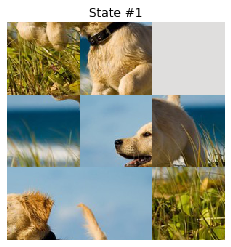

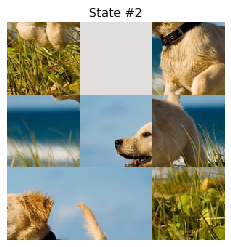

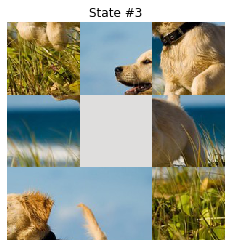

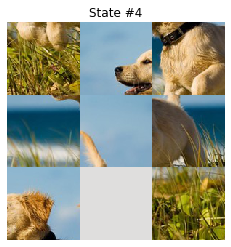

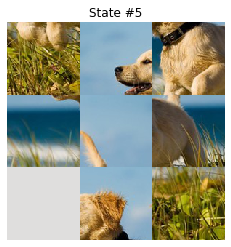

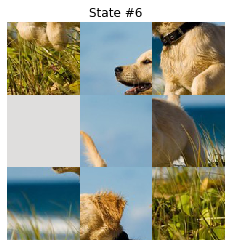

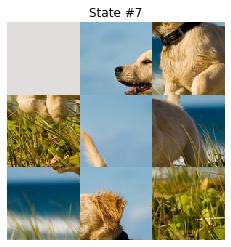

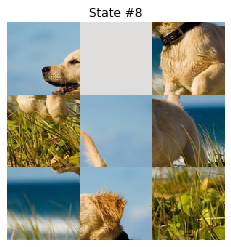

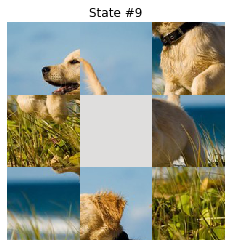

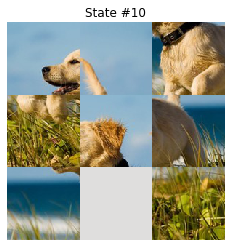

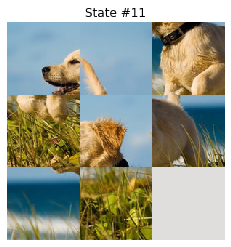

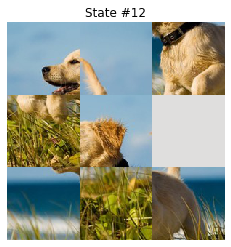

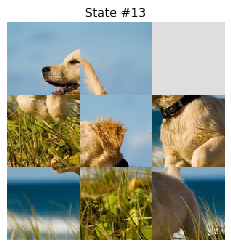

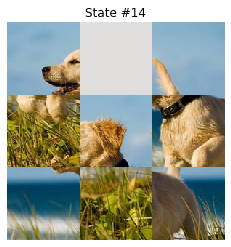

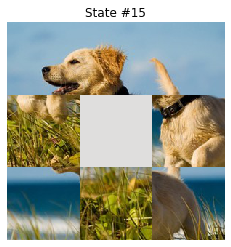

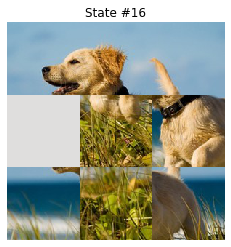

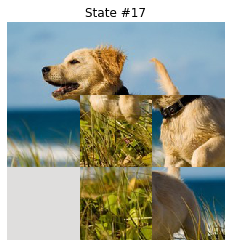

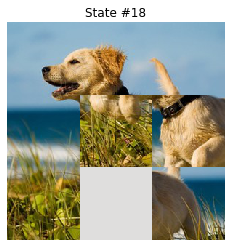

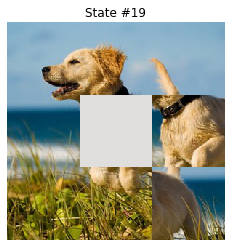

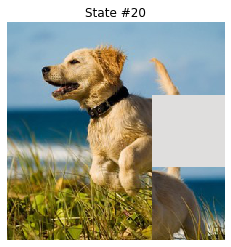

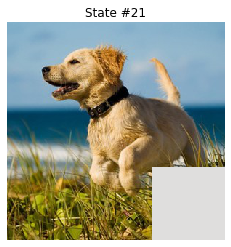

<Figure size 432x288 with 0 Axes>

In [4]:
from _collections import deque
from timeit import default_timer as timer
import copy
import heapq as heap


class Node:
    state_array = []
    position = ''
    depth = 0
    current_path = []

    def __init__(self, state_array, position, depth, current_path=None, heuristic=None):
        self.state_array = state_array
        self.position = position
        
        self.heuristic = heuristic  # A* heuristic
        self.current_path = current_path
def find_open_position(puzzle):
    for i in range(3):  # i = column #, j = row
        for j in range(3):
            if puzzle[i][j] == '0':
                entry = str(i) + str(j)  # Open spot in puzzle
    return entry
GOAL_STATE = [['1', '2', '3'], ['4', '5', '6'], ['7', '8', '0']]


# Solves a puzzle using the Manhattan distance heuristic
# which is total number of moves of each piece from the goal state
def solve_manhattan(puzzle):
    queue = []  # Queue
    visited_states = {}  # Visited_States
    depth = 0
    puzzle = to_2d_array(puzzle)  # Transforms puzzle to 2-d array
    start = timer()  # timer start
    path = [to_string(puzzle)]  # Adds starting state to path
    # Creates origin node
    node = Node(puzzle, find_open_position(puzzle), depth, path, get_manhattan(puzzle))  # Origin state
    visited_states[to_string(node.state_array)] = 1  # adds visited states as an in-order string
    heap.heappush(queue, (node.heuristic, 0, node))  # Adds origin state to queue making it a heap
    temp_tuple = heap.heappop(queue)  # Gets tuple
    node = temp_tuple[2]  # Grabs node from tuple
    solved = True
    #  Loop walks through puzzle and checks if goal state is reached
    while node.state_array != GOAL_STATE:
        children = get_children(node)  # Child States
        for child in children:  # Check for previously visited states
            if to_string(child) in visited_states:
                pass
            elif to_string(child) not in visited_states:
                visited_states[to_string(child)] = 1  # Adds new state to visited states
                new_path = copy.deepcopy(node.current_path)  # Creates a new path and adds itself to the path
                new_path.append(to_string(child))  # Creates a new node
                new_node = Node(child, find_open_position(child), node.depth + 1, current_path=new_path,
                                heuristic=get_manhattan(child) + node.depth + 1)
                heap.heappush(queue, (new_node.heuristic, len(visited_states), new_node))  # Pushes onto heap                
        if queue:  # Queue is not empty
            node = heap.heappop(queue)
            node = node[2]
        else:  # Queue is empty and goal state not achieved
            print(" ")
            print("Sorry, puzzle not solvable!")
            print(" ")
            solved = False
            break

    end = timer()
    time = end - start
    if solved:
        print("Path: ")
        path = ""
        cont = 0
        for state in node.current_path:
            path = path+" "+state
            print('state', state)
            ##convert(state)
            cont +=1
            create_images(convert(state), cont)
            print('_____________________________')
        print(path)

       
        print("----------------")
        print("A* Misplaced tile solution found in: " + str(time) + " seconds at " + str(cont) + " depth")
        print('Nodes explored: ' + str(len(visited_states)))
        print("  ")

    else:
        print("A* # Moves Search took: " + str(time) + " seconds, and explored " + str(len(visited_states)) + " nodes.")
        print(" ")


# Function returns the current manhattan distance
def get_manhattan(state):
    manhattan = 0  # Total # of misplaced tiles by Steps
    for x in range(3):
        for y in range(3):
            current = int(state[x][y])  # Value of tile
            if current != 0:
                xtarget = (current - 1) // 3  # Gets target location of
                ytarget = (current - 1) % 3
                dx = x - xtarget
                dy = y - ytarget
                manhattan += abs(dx) + abs(dy)
    return manhattan


# Returns position heuristic for puzzle pieces not in
# Goal State location
def get_position(state):
    position = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != heuristic_position[str(i) + str(j)]:
                position += 1
    return position


# Prints puzzle for output format


# Gets child node positions of the current state
# Takes the current state as parameter
# Returns a list of future states aka children from current state
def get_children(node):
    state = node.state_array
    children = []  # List of possible moves after
    possible_moves = []  # Temp List of possible moves
    r = int(node.position[0])  # Row
    c = int(node.position[1])  # Column

    if r == 0 and c == 0:
        possible_moves.append('01')
        possible_moves.append('10')
    elif r == 0 and c == 1:  # Puzzle slots: RC
        possible_moves.append('00')  # 00 01 02
        possible_moves.append('02')  # 10 11 12
        possible_moves.append('11')  # 20 21 22

    elif r == 0 and c == 2:
        possible_moves.append('01')
        possible_moves.append('12')

    elif r == 1 and c == 0:  # Puzzle slots: RC
        possible_moves.append('00')  # 00 01 02
        possible_moves.append('11')  # 10 11 12
        possible_moves.append('20')  # 20 21 22

    elif r == 1 and c == 1:
        possible_moves.append('01')
        possible_moves.append('10')
        possible_moves.append('12')
        possible_moves.append('21')

    elif r == 1 and c == 2:  # Puzzle slots: RC
        possible_moves.append('02')  # 00 01 02
        possible_moves.append('22')  # 10 11 12
        possible_moves.append('11')  # 20 21 22

    elif r == 2 and c == 0:
        possible_moves.append('10')
        possible_moves.append('21')

    elif r == 2 and c == 1:  # Puzzle slots: RC
        possible_moves.append('20')  # 00 01 02
        possible_moves.append('11')  # 10 11 12
        possible_moves.append('22')  # 20 21 22

    elif r == 2 and c == 2:
        possible_moves.append('21')
        possible_moves.append('12')
        
    for move in possible_moves:
        children.append(slide_tiles(state, node.position, move))
    return children


# Converts puzzle from string to 2D array
def to_2d_array(puz):
    puzzle = [['0', '0', '0'], ['0', '0', '0'], ['0', '0', '0']]
    count = 0
    for i in range(3):
        for j in range(3):
            puzzle[i][j] = puz[count]
            count += 1
    return puzzle


# Received state and generates a new state by
# Sliding the tiles from move into open space 'Current'
def slide_tiles(state, current, move):
    temp_state = copy.deepcopy(state)

    # Swaps the tiles in a very smooth way
    temp_state[int(current[0])][int(current[1])], temp_state[int(move[0])][int(move[1])] = \
        temp_state[int(move[0])][int(move[1])], temp_state[int(current[0])][int(current[1])]
    return temp_state


# Converts 2-d array into string
def to_string(puz):
    state = ''
    for i in range(3):
        for j in range(3):
            state = state + puz[i][j]
    return state

# Generates a puzzle
def generate_puzzle():
    puzzle = []
    while len(puzzle) < 9:
        num = random.randint(0, 8)
        if str(num) not in puzzle:
            puzzle.append(str(num))
    return puzzle


# This function was adapted from:

# Used for testing purposes
def is_solvable(puzzle):
    inversions = 0
    for i in range(len(puzzle)):
        for j in range(1, len(puzzle)):
            if puzzle[i] > puzzle[j]:
                inversions += 1
        if puzzle[i] == 0 and i % 2 == 1:
            inversions += 1
    return inversions % 2 == 0

def convert(state):
  puzzle = ['0', '0', '0', '0', '0', '0', '0', '0', '0']
  for i in range(9):
    puzzle[i] = state[i:i+1]            
  print(puzzle) 
  return puzzle

def create_images(state_square,cont):
  pictures = Image.new('RGB', (300,300), color = (223, 222, 221 ))
  if(state_square[0] != '0'):
    pictures.paste(Square_Image[int(state_square[0])-1],(0,0))
  if(state_square[1] != '0'):
    pictures.paste(Square_Image[int(state_square[1])-1],(100,0))
  if(state_square[2] != '0'):
    pictures.paste(Square_Image[int(state_square[2])-1],(200,0))
  if(state_square[3] != '0'):
    pictures.paste(Square_Image[int(state_square[3])-1],(0,100))
  if(state_square[4] != '0'):
    pictures.paste(Square_Image[int(state_square[4])-1],(100,100))
  if(state_square[5] != '0'):  
    pictures.paste(Square_Image[int(state_square[5])-1],(200,100))
  if(state_square[6] != '0'):
    pictures.paste(Square_Image[int(state_square[6])-1],(0,200))
  if(state_square[7] != '0'):
    pictures.paste(Square_Image[int(state_square[7])-1],(100,200))
  if(state_square[8] != '0'):
    pictures.paste(Square_Image[int(state_square[8])-1],(200,200))
  ruta = '/content/finn'+str(cont)+'.bmp'
  #print('ruta:', ruta)
  #pictures.save(ruta)
  plt.imshow(pictures)
  plt.axis('off')
  plt.title('State #'+str(cont)+ '')
  plt.figure()
  

if __name__ == "__main__":
    print('This is the initial state: ', objetivo)
    solve_manhattan(objetivo)    
    pass



**Inteligencia Artificial Eduardo Zurek, PH.D** 🚀

***UNIVERSIDAD DEL NORTE***

**Abraham Lugo Ramírez**

**Elkin Rodríguez Pérez**

**Cristian Zapata Lázaro**

# 📋
En el presente reporte se va a hablar sobre el problema del 8-puzzle-Slide para ordenar una imagen y la respectiva solución. El programa se implemento usando **Jupyter** y desarrollado en **Google Collaboratory**, con el lenguaje **Python**. Se usaron las siguientes librerías:
- from PIL import Image
- from itertools import groupby
- import matplotlib.pyplot as plt
- import numpy as np
- import math
- import random
- import matplotlib.pyplot as plt
- import matplotlib.image as mpimg

Inicialmente, se sube una imagen de 300x300 pixeles en formato bmp, la cual se cortará en 9 pedazos. Después se crearán 9 imágenes tipo RGB a las cuales se le asignará a cada una un pedazo de la imagen cortada inicialmente. (Sección 1). Después de eso, se crea una nueva imagen con los pedazos que se crearon anteriormente. (Sección 2).

> **Ruta foto** = '/content/foto.bmp'

![enter image description here](https://raw.githubusercontent.com/AbrahamLugoRamirez/Puzzle-slide-IA/master/cuadro3x3.jpg)

En la siguiente sección se van a comparar los pixeles para ver cómo se puede ordenar la imagen. Primero se tienen los vectores **R, G, B**, estos se van a usar para comparar todas las imágenes que se crearon en lo último de la sección 1. ⚙️



---  

![enter image description here](https://raw.githubusercontent.com/AbrahamLugoRamirez/Puzzle-slide-IA/master/Opc1.png)
  
 *Comparamos toda la ultima columna de la image1 con la primera columna de la imag2*

![enter image description here](https://raw.githubusercontent.com/AbrahamLugoRamirez/Puzzle-slide-IA/master/Opc2.png)

  
 *Comparamos toda la ultima fila de la image1 con la primera fila de la imag2.*
  

![enter image description here](https://raw.githubusercontent.com/AbrahamLugoRamirez/Puzzle-slide-IA/master/Opc3.png)

*Comparamos toda la primera columna de la image1 con la ultima columna de la imag2.*
  

![enter image description here](https://raw.githubusercontent.com/AbrahamLugoRamirez/Puzzle-slide-IA/master/Opc4.png)

*Comparamos toda la primera fila de la image1 con la ultima fila de la imag2.*




---



Las imágenes se van a comparar en grupos de 2 usando los pixeles. Primero se van a obtener los píxeles de cada imagen y luego se va a sacar la ***media*** y la ***varianza muestral***. La media se agregará a los respectivos vectores **R, G, B** para así poder hacer respectivas conclusiones. A partir de lo anterior se van a utilizar las imágenes creadas anteriormente para buscar el objetivo, con el cual se empezará a ordenar la imagen. (Sección 3)



$RGB = [R,G, B]$

$ Media(RGB) =  \frac{Pixel1(RGB)+Pixel2(RGB)}{n}.$


$ Varianza(RGB) = \frac{(Pixel1(RGB)-Media(RGB))^{2}+(Pixel2(RGB)-Media(RGB))^{2}}{n-1}.$

Ademas de usar la **media** y la **varianza muestral**, optamos por usar la **distancia euclidiana** entre estos dos puntos. Los valores de la matriz de salida representan la distancia entre cada píxel.

$ DistanciaEuclidiana = \sqrt{\sum_{i=0}^{n}(pixel(RGB)-pixel2(RGB))^{2}}$

Al final cuando el proceso de esta sección haya terminado con éxito, tendremos un vector con la posición inicial del **Puzzle Slide**

*Por ejemplo:*

>  **Objetivo finally** = ['4', '1', '6', '3', '8', '0', '5', '7', '2']


En la última sección se va resolver el problema planteado a partir del objetivo encontrado anteriormente. Inicialmente, se define el estado meta, el cual corresponde al estado en que la figura se encuentra totalmente ordenada.

  

>  **GOAL_STATE** = ['1', '2', '3', '4', '5', '6', '7', '8', '0']

Después de esto se va a resolver el 8-puzzle a partir del objetivo creado en la sección 3. Para resolver esto, se va a utilizar como heurística, la conocida distancia de Manhattan la cual se define como: $d(p,q) = abs(p1-q1) + abs(p2-q2).$ Aquí se van a utilizar el número de movimientos de cada pieza hasta llegar al estado meta, para ello se vá a utilizar una cola con los estados visitados. Si en los respectivos movimientos, la cola queda vacía y no se llega al estado meta, entonces, el 8-puzzle, no tendrá solución.
En lo siguiente se van a mostrar los respectivos movimientos para ordenar la imagen. En la última parte se muestra como se va ordenando la imagen a partir de los movimientos realizados anteriormente.(Sección 4).

> A* Misplaced tile solution found in: #.## seconds at # depth 
> Nodes explored: ##

![enter image description here](https://raw.githubusercontent.com/AbrahamLugoRamirez/Puzzle-slide-IA/master/manhattan.png)


**Github: [Link to respository](https://github.com/AbrahamLugoRamirez/Puzzle-slide-IA)**
